In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

# importing data

In [2]:
import io
%cd "C:\Users\sadin\Desktop\IMARTICUS\PYTHON\MY DATA SETS\SALES EXCELLENCE"

C:\Users\sadin\Desktop\IMARTICUS\PYTHON\MY DATA SETS\SALES EXCELLENCE


In [3]:
sales_train=pd.read_csv("train.csv")
sales_test=pd.read_csv("test.csv")

# DESCRIPTIVE STATISTICS

In [4]:
print(sales_test.info())
print(sales_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30037 entries, 0 to 30036
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   30037 non-null  object 
 1   Gender                               30037 non-null  object 
 2   DOB                                  30034 non-null  object 
 3   Lead_Creation_Date                   30037 non-null  object 
 4   City_Code                            29723 non-null  object 
 5   City_Category                        29723 non-null  object 
 6   Employer_Code                        28432 non-null  object 
 7   Employer_Category1                   28432 non-null  object 
 8   Employer_Category2                   28342 non-null  float64
 9   Monthly_Income                       30037 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  26000 non-null  object 
 11  Primary_Bank_Type           

In [5]:
print(sales_test.shape)
print(sales_train.shape)

(30037, 21)
(69713, 22)


In [6]:
sales_test.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
0,APPA70109647212,Male,03/06/88,05/07/16,C10028,C,COM0002222,A,4.0,2150.0,...,P,Y,S122,B,0.0,10000.0,3.0,20.0,372.0,4
1,APPB10687939341,Male,13/07/81,01/07/16,C10003,A,COM0001784,C,4.0,4200.0,...,P,Y,S133,C,0.0,69000.0,5.0,24.0,1985.0,7
2,APPC80449411414,Female,19/11/90,01/07/16,C10009,B,COM0045260,B,4.0,1000.0,...,P,N,S133,B,0.0,NaN,NaN,NaN,NaN,0
3,APPD30665094501,Female,15/10/92,01/07/16,C10005,A,COM0000085,A,3.0,1465.0,...,P,N,S133,C,0.0,NaN,NaN,NaN,NaN,0
4,APPE80379821637,Male,21/09/88,01/07/16,C10005,A,COM0006422,A,4.0,2340.0,...,P,Y,S143,B,500.0,10000.0,2.0,NaN,NaN,0


In [7]:
sales_train.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [8]:
sales_test.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
count,28342.000000,3.003700e+04,30005.000000,18166.000000,18166.000000,9652.000000,9652.000000,30037.000000
mean,3.728248,3.977139e+03,348.909060,39482.990201,3.903116,19.280537,1094.914836,3.962313
std,0.794883,2.328960e+04,1000.816847,30527.865594,1.150820,5.882246,727.452303,3.821020
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,20000.000000,3.000000,15.250000,625.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,946.000000,2.000000
75%,4.000000,4.000000e+03,350.000000,50000.000000,5.000000,20.000000,1291.000000,7.000000
max,4.000000,3.500000e+06,43000.000000,300000.000000,6.000000,37.000000,6979.000000,10.000000


In [9]:
sales_train.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
count,65415.000000,6.971300e+04,69662.000000,42004.000000,42004.000000,22276.000000,22276.000000,69713.000000,69713.000000
mean,3.720187,5.622283e+03,360.928751,39429.982859,3.890629,19.213570,1101.466242,3.948446,0.014631
std,0.807374,1.747671e+05,2288.517927,30727.595990,1.167491,5.847136,752.661394,3.819214,0.120073
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,20000.000000,3.000000,15.250000,649.000000,0.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000,2.000000,0.000000
75%,4.000000,4.000000e+03,350.000000,50000.000000,5.000000,20.000000,1295.000000,7.000000,0.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000


In [10]:
print(sales_train.skew())

Employer_Category2     -2.759541
Monthly_Income        168.415068
Existing_EMI          194.930553
Loan_Amount             2.100643
Loan_Period            -0.846952
Interest_Rate           1.424562
EMI                     2.673024
Var1                    0.458350
Approved                8.084784
dtype: float64


C:\Users\sadin\AppData\Local\Temp\ipykernel_18600\2858336306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sales_train.skew())


In [11]:
print(sales_train.kurt())

Employer_Category2        6.032391
Monthly_Income        34319.823337
Existing_EMI          46212.751405
Loan_Amount               6.406146
Loan_Period              -0.233528
Interest_Rate             1.116577
EMI                      14.789050
Var1                     -1.321762
Approved                 63.365558
dtype: float64


C:\Users\sadin\AppData\Local\Temp\ipykernel_18600\2008087917.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sales_train.kurt())


In [12]:
print(sales_test.skew())

Employer_Category2     -2.819265
Monthly_Income        117.661283
Existing_EMI           12.381605
Loan_Amount             2.082216
Loan_Period            -0.846848
Interest_Rate           1.388766
EMI                     2.231335
Var1                    0.455621
dtype: float64


C:\Users\sadin\AppData\Local\Temp\ipykernel_18600\1102628179.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sales_test.skew())


In [13]:
print(sales_train.kurt())

Employer_Category2        6.032391
Monthly_Income        34319.823337
Existing_EMI          46212.751405
Loan_Amount               6.406146
Loan_Period              -0.233528
Interest_Rate             1.116577
EMI                      14.789050
Var1                     -1.321762
Approved                 63.365558
dtype: float64


C:\Users\sadin\AppData\Local\Temp\ipykernel_18600\2008087917.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sales_train.kurt())


In [14]:
print(sales_test.columns)


Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1'],
      dtype='object')


In [15]:
print(sales_train.columns)

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')


# DATA VISUALIZATION

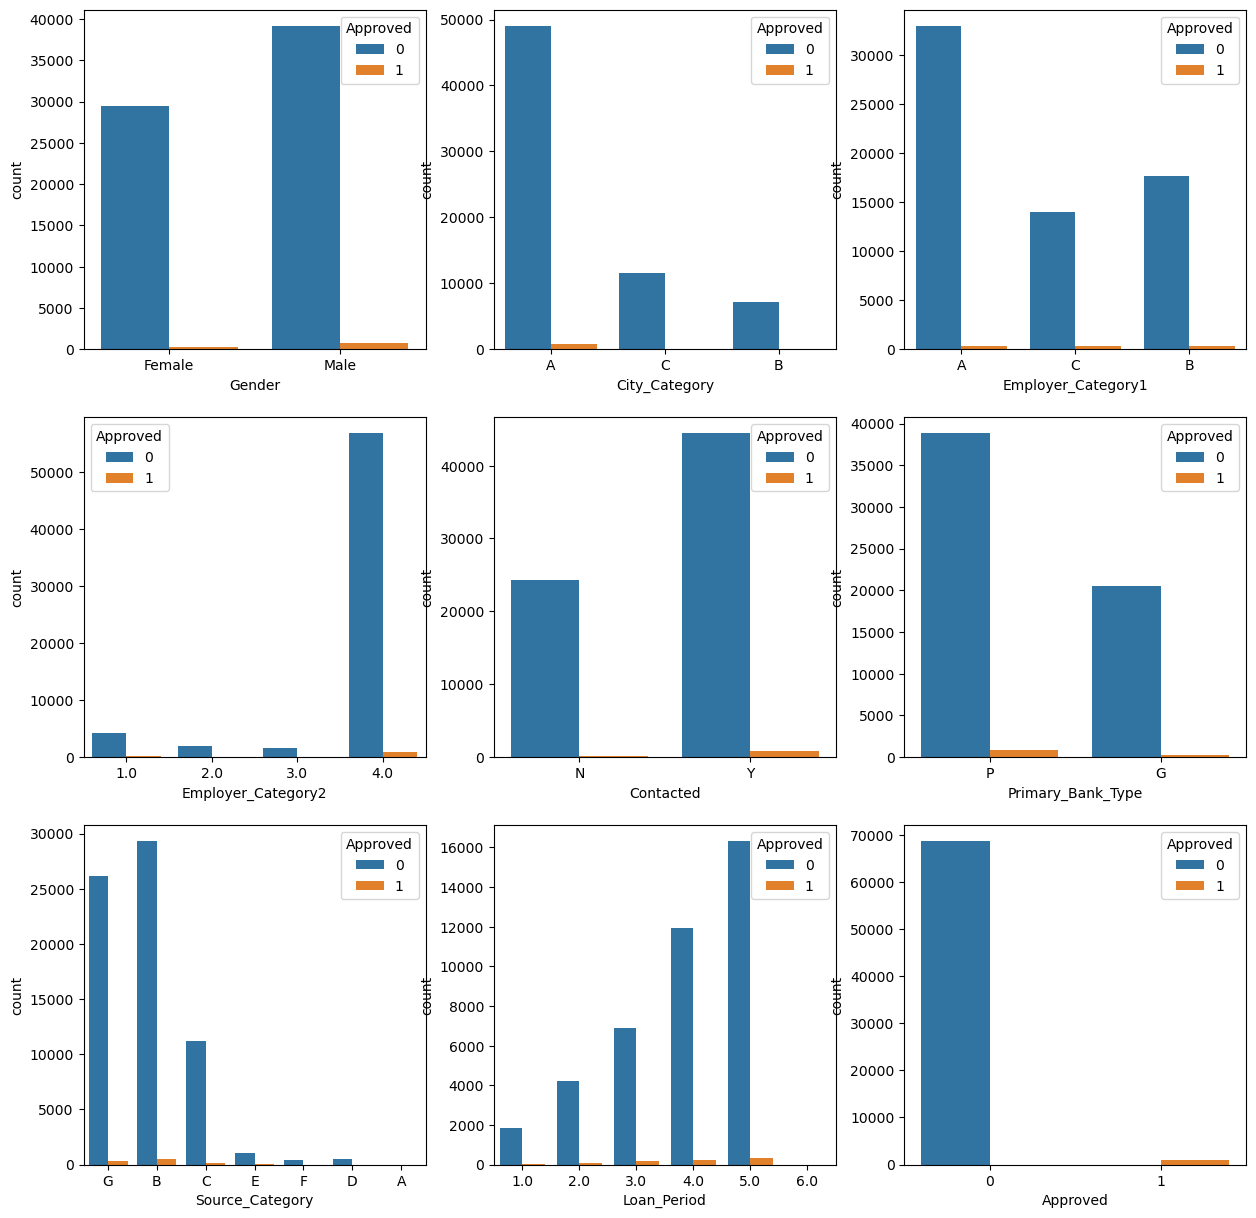

In [16]:
# Count of each label for applicable features

#names of all the columns
cols = sales_train[["Gender","City_Category","Employer_Category1","Employer_Category2","Contacted",
                    "Primary_Bank_Type","Source_Category","Loan_Period",'Approved']]

#Plot count plot for all attributes in a 3 * 3 grid
fig , ax=plt.subplots(nrows = 3, ncols = 3, figsize=(15,15))
for variable, subplot in zip(cols, ax.flatten()):
        sns.countplot(x=sales_train[variable],data=sales_train, ax = subplot,hue=sales_train.Approved)
plt.show()

In [48]:
# THE MAIN OBSERVATIONS FROM THE DATA ARE
# 1) THE PEOPLE FROM "A" CATEGORY CITY HAS APPLIED FOR MORE LOANS, THEN THE "C" CATEGORY CITY PEOPLE. THE RATE OF PEOPLE 
# APPLYING FOR LOANS FROM "B" CATEGORY CITY IS VEY LOW COMPARED TO OTHER CITIES.
# 2)  THE EMPLOYEES OF CATEGORY "A" HAVE APPLIED FOR MORE LOANS COMPARED TO "B" & "C" CATEGORY EMPLOYEES.
# 3) THE PEOPLE WHO APPLIED FOR LOANS WITH THEIR CONTACT VERIFIED ARE HIGHER THAN PEOPLE WITH NO CONTACT VERIFIED.
# 4) THE P PRIMARY BANK TYPE HAS MORE LOAN APPLICANTS THAN G BANK TYPE.
# 5) MAJORITY OF THE PEOPLE HAVE APPLIED LOANS WITH HIGHER LOAN PERIOD (5 YEARS) AND THE COUNT IS BEING DECREASED GRADUALLY 
# AS DECREASE IN LOAN PERIOD.
# 6) THE COUNT OF PEOPLE WHO GOT THEIR LOAN APPROVED IS VERY 
# LOW COMPARED TO NOT APPROVED PEOPLE.

<AxesSubplot: xlabel='Interest_Rate', ylabel='Count'>

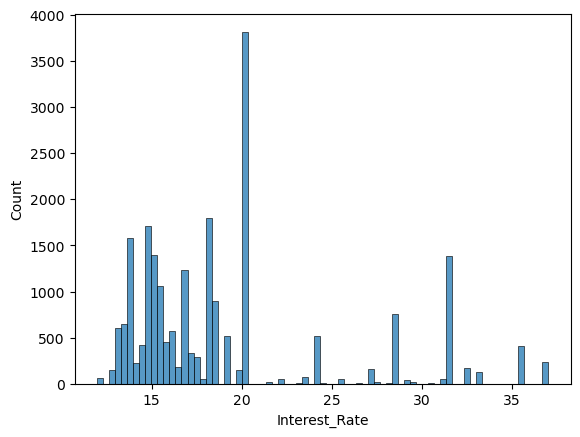

In [17]:
sns.histplot(data=sales_train.Interest_Rate)

In [18]:
# THE MAXIMUM PEOPLE HAS APPLIED FOR LOAN WITH INTREST RATE OF 20 AND THEN IN BETWEEN 14-16.

# DATA PRE PROCESSING

In [19]:
# Adding dependant to test for combining.
# combining test and train datasets for pre processing.
sales_test["Approved"]="test"

In [20]:
combined_sales=pd.concat([sales_test,sales_train],axis=0)

In [21]:
combined_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99750 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   99750 non-null  object 
 1   Gender                               99750 non-null  object 
 2   DOB                                  99732 non-null  object 
 3   Lead_Creation_Date                   99750 non-null  object 
 4   City_Code                            98622 non-null  object 
 5   City_Category                        98622 non-null  object 
 6   Employer_Code                        94127 non-null  object 
 7   Employer_Category1                   94127 non-null  object 
 8   Employer_Category2                   93757 non-null  float64
 9   Monthly_Income                       99750 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  86322 non-null  object 
 11  Primary_Bank_Type           

In [22]:
# deleting the columns ID and DOB from the DataFrame
combined_sales=combined_sales.drop(["ID","DOB"],axis=1)

In [23]:
# dividing the features into object and numeric
objectcols=combined_sales.select_dtypes(include="object")
numericcols=combined_sales.select_dtypes(include=np.number)

In [24]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99750 entries, 0 to 69712
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Gender                               99750 non-null  object
 1   Lead_Creation_Date                   99750 non-null  object
 2   City_Code                            98622 non-null  object
 3   City_Category                        98622 non-null  object
 4   Employer_Code                        94127 non-null  object
 5   Employer_Category1                   94127 non-null  object
 6   Customer_Existing_Primary_Bank_Code  86322 non-null  object
 7   Primary_Bank_Type                    86322 non-null  object
 8   Contacted                            99750 non-null  object
 9   Source                               99750 non-null  object
 10  Source_Category                      99750 non-null  object
 11  Approved                             9975

In [25]:
numericcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99750 entries, 0 to 69712
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employer_Category2  93757 non-null  float64
 1   Monthly_Income      99750 non-null  float64
 2   Existing_EMI        99667 non-null  float64
 3   Loan_Amount         60170 non-null  float64
 4   Loan_Period         60170 non-null  float64
 5   Interest_Rate       31928 non-null  float64
 6   EMI                 31928 non-null  float64
 7   Var1                99750 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 6.8 MB


In [26]:
numericcols.head()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
0,4.0,2150.0,0.0,10000.0,3.0,20.0,372.0,4
1,4.0,4200.0,0.0,69000.0,5.0,24.0,1985.0,7
2,4.0,1000.0,0.0,NaN,NaN,NaN,NaN,0
3,3.0,1465.0,0.0,NaN,NaN,NaN,NaN,0
4,4.0,2340.0,500.0,10000.0,2.0,NaN,NaN,0


In [27]:
# move "Employer_Category2" from numeric cols to object cols as it is a category column
objectcols["Employer_Category2"]=numericcols.Employer_Category2

In [28]:
numericcols=numericcols.drop("Employer_Category2",axis=1)

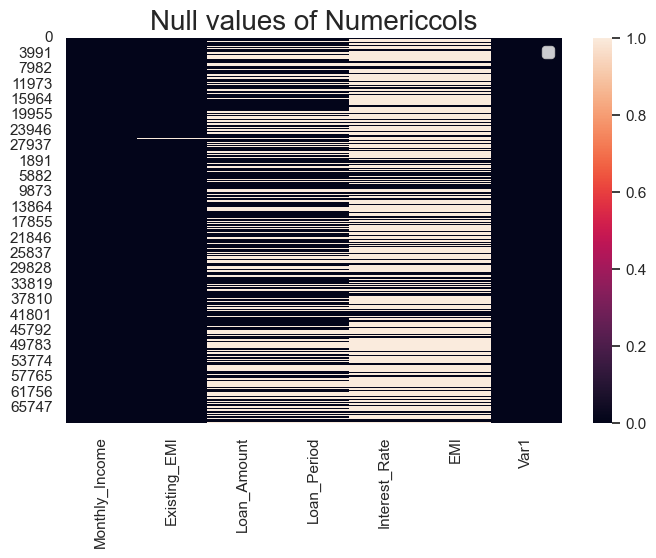

In [29]:
# plotting a plot for missing values
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.heatmap(numericcols.isnull())
plt.title('Null values of Numericcols',fontdict={'fontsize': 20})
plt.legend(numericcols.isnull())
plt.show()

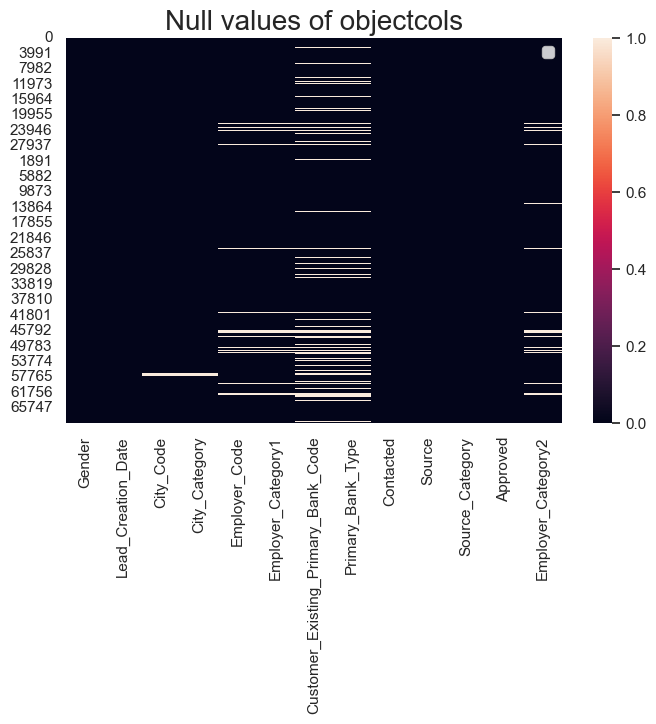

In [30]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.heatmap(objectcols.isnull())
plt.title('Null values of objectcols',fontdict={'fontsize': 20})
plt.legend(objectcols.isnull())
plt.show()

In [31]:
# building a for loop for value_counts
for i in numericcols.columns:
    print(numericcols[i].value_counts(dropna=False))

2500.0    6673
2000.0    5176
1500.0    4837
3000.0    3645
5000.0    2650
          ... 
4318.0       1
4876.5       1
4031.6       1
3705.0       1
9893.0       1
Name: Monthly_Income, Length: 6362, dtype: int64
0.0       66732
500.0      3011
1000.0     2023
300.0      1740
400.0      1399
          ...  
750.2         1
219.9         1
2459.0        1
1019.6        1
2364.8        1
Name: Existing_EMI, Length: 4094, dtype: int64
NaN         39580
10000.0      7922
20000.0      7569
30000.0      6196
50000.0      5527
            ...  
194000.0        1
183000.0        1
199000.0        1
129000.0        1
210000.0        1
Name: Loan_Amount, Length: 207, dtype: int64
NaN    39580
5.0    23841
4.0    17459
3.0    10163
2.0     6074
1.0     2630
6.0        3
Name: Loan_Period, dtype: int64
NaN      67822
20.00     5429
14.85     2287
31.50     1994
13.99     1949
         ...  
20.50        4
14.55        3
15.15        2
15.49        2
15.60        1
Name: Interest_Rate, Length: 73,

In [32]:
for i in objectcols.columns:
    print(objectcols[i].value_counts(dropna=False))

Male      57153
Female    42597
Name: Gender, dtype: int64
02/09/16    2614
22/09/16    2305
30/09/16    1513
26/09/16    1479
29/09/16    1449
            ... 
24/07/16     559
31/07/16     556
11/09/16     551
10/07/16     516
14/08/16     435
Name: Lead_Creation_Date, Length: 92, dtype: int64
C10001    14313
C10002    12462
C10003    12350
C10004     8341
C10005     7952
          ...  
C10695        1
C10720        1
C10649        1
C10586        1
C10686        1
Name: City_Code, Length: 705, dtype: int64
A      71383
C      16761
B      10478
NaN     1128
Name: City_Category, dtype: int64
NaN           5623
COM0000002     622
COM0000003     448
COM0000004     392
COM0000005     324
              ... 
COM0043804       1
COM0034972       1
COM0043383       1
COM0014235       1
COM0045789       1
Name: Employer_Code, Length: 48282, dtype: int64
A      47805
B      25800
C      20522
NaN     5623
Name: Employer_Category1, dtype: int64
B001    20155
B002    15545
B003    13682
NaN    

In [33]:
# using iterative imputer for missing value imputation
from sklearn.experimental import enable_iterative_imputer

In [34]:
from sklearn.impute import IterativeImputer

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
imputer_numeric=IterativeImputer(estimator=DecisionTreeRegressor(),initial_strategy="mean",max_iter=10)

In [37]:
numericcols_impute=imputer_numeric.fit_transform(numericcols)

In [38]:
numericcols_impute=pd.DataFrame(numericcols_impute,columns=numericcols.columns)

In [39]:
numericcols_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99750 entries, 0 to 99749
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Monthly_Income  99750 non-null  float64
 1   Existing_EMI    99750 non-null  float64
 2   Loan_Amount     99750 non-null  float64
 3   Loan_Period     99750 non-null  float64
 4   Interest_Rate   99750 non-null  float64
 5   EMI             99750 non-null  float64
 6   Var1            99750 non-null  float64
dtypes: float64(7)
memory usage: 5.3 MB


In [40]:
# building a for loop for value_counts
for i in numericcols_impute.columns:
    print(numericcols_impute[i].value_counts(dropna=False))

2500.0    6673
2000.0    5176
1500.0    4837
3000.0    3645
5000.0    2650
          ... 
4318.0       1
4876.5       1
4031.6       1
3705.0       1
9893.0       1
Name: Monthly_Income, Length: 6362, dtype: int64
0.0       66764
500.0      3013
1000.0     2023
300.0      1740
400.0      1399
          ...  
543.7         1
3242.7        1
746.8         1
4060.0        1
2364.8        1
Name: Existing_EMI, Length: 4106, dtype: int64
10000.0     11040
20000.0      9340
30000.0      8116
50000.0      7141
42000.0      3813
            ...  
241000.0        1
164000.0        1
179000.0        1
199000.0        1
210000.0        1
Name: Loan_Amount, Length: 214, dtype: int64
4.0    37721
5.0    35146
3.0    15550
2.0     8247
1.0     3082
6.0        3
4.5        1
Name: Loan_Period, dtype: int64
20.000000    14855
31.500000     7570
15.250000     5542
24.000000     5058
28.500000     4039
             ...  
14.996667        2
15.150000        2
15.490000        2
18.400000        1
15.6000

In [41]:
# correlation matrix
numericcols_impute.corr()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
Monthly_Income,1.000000,0.237213,0.038418,-0.003911,-0.018944,0.047806,0.025207
Existing_EMI,0.237213,1.000000,0.013334,-0.009248,-0.042040,0.022577,0.004105
Loan_Amount,0.038418,0.013334,1.000000,0.327180,-0.483337,0.908795,0.290890
Loan_Period,-0.003911,-0.009248,0.327180,1.000000,-0.118830,0.030613,-0.098742
Interest_Rate,-0.018944,-0.042040,-0.483337,-0.118830,1.000000,-0.383665,-0.420018
EMI,0.047806,0.022577,0.908795,0.030613,-0.383665,1.000000,0.314741
Var1,0.025207,0.004105,0.290890,-0.098742,-0.420018,0.314741,1.000000


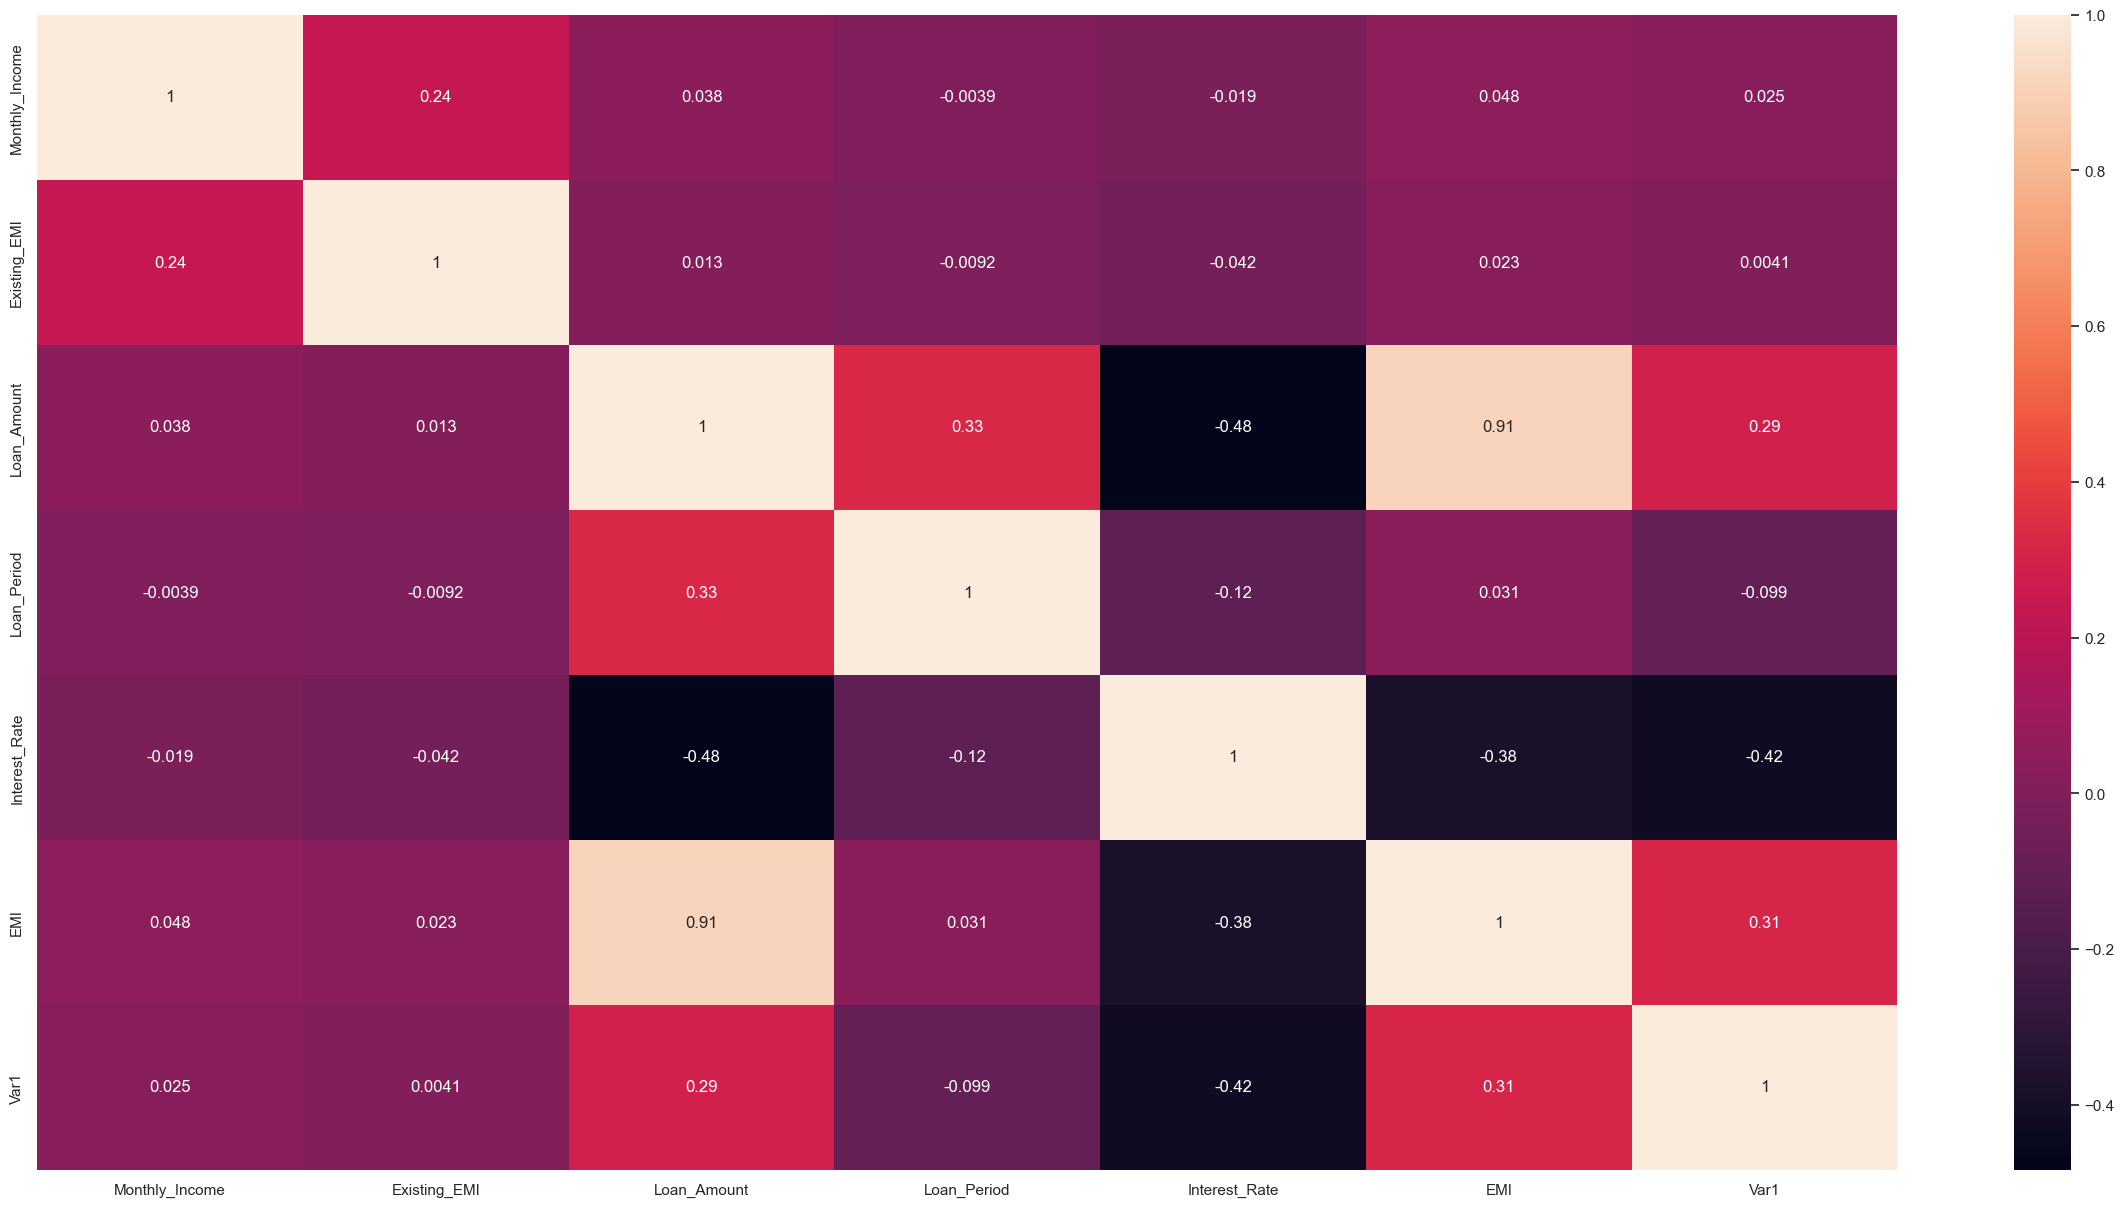

In [42]:
# correlation plot - checking for multi collinearity
plt.figure(figsize=(30,15))
sns.heatmap(numericcols_impute.corr(),annot=True)
plt.show()

In [43]:
# there is no multi collinearity

In [44]:
# scaling of numeric cols
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler=MinMaxScaler()

In [46]:
numericcols_scaled=scaler.fit_transform(numericcols_impute)

In [47]:
numericcols_scaled=pd.DataFrame(numericcols_scaled,columns=numericcols_impute.columns[0:8])

In [45]:
# object cols imputing
# label encoding object cols
from sklearn.preprocessing import LabelEncoder

In [46]:
numericcols["Approved"]=objectcols.Approved


In [47]:
numericcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99750 entries, 0 to 69712
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Monthly_Income  99750 non-null  float64
 1   Existing_EMI    99667 non-null  float64
 2   Loan_Amount     60170 non-null  float64
 3   Loan_Period     60170 non-null  float64
 4   Interest_Rate   31928 non-null  float64
 5   EMI             31928 non-null  float64
 6   Var1            99750 non-null  int64  
 7   Approved        99750 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 6.8+ MB


In [48]:
objectcols=objectcols.drop("Approved",axis=1)

In [49]:
original=objectcols

In [50]:
mask=objectcols.isnull()

In [51]:
objectcols=objectcols.astype(str).apply(LabelEncoder().fit_transform)

In [52]:
objectcols=objectcols.where(~mask,original)

In [53]:
objectcols.isnull().sum().sort_values(ascending=False)

Customer_Existing_Primary_Bank_Code    13428
Primary_Bank_Type                      13428
Employer_Category2                      5993
Employer_Code                           5623
Employer_Category1                      5623
City_Code                               1128
City_Category                           1128
Gender                                     0
Lead_Creation_Date                         0
Contacted                                  0
Source                                     0
Source_Category                            0
dtype: int64

In [54]:
# dropping the code columns
objectcols=objectcols.drop(['Customer_Existing_Primary_Bank_Code','Employer_Code','City_Code'],axis=1)

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),initial_strategy="most_frequent",max_iter=10)

In [57]:
objectcols_impute=imputer.fit_transform(objectcols)

C:\Users\sadin\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\sadin\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [58]:
objectcols_impute=pd.DataFrame(objectcols_impute,columns=objectcols.columns)

In [59]:
objectcols_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99750 entries, 0 to 99749
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              99750 non-null  float64
 1   Lead_Creation_Date  99750 non-null  float64
 2   City_Category       99750 non-null  float64
 3   Employer_Category1  99750 non-null  float64
 4   Primary_Bank_Type   99750 non-null  float64
 5   Contacted           99750 non-null  float64
 6   Source              99750 non-null  float64
 7   Source_Category     99750 non-null  float64
 8   Employer_Category2  99750 non-null  float64
dtypes: float64(9)
memory usage: 6.8 MB


In [60]:
# combining the cleaned imputed and encoded columns together
sales_clean=pd.concat([objectcols_impute,numericcols_scaled],axis=1)

In [61]:
sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99750 entries, 0 to 99749
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              99750 non-null  float64
 1   Lead_Creation_Date  99750 non-null  float64
 2   City_Category       99750 non-null  float64
 3   Employer_Category1  99750 non-null  float64
 4   Primary_Bank_Type   99750 non-null  float64
 5   Contacted           99750 non-null  float64
 6   Source              99750 non-null  float64
 7   Source_Category     99750 non-null  float64
 8   Employer_Category2  99750 non-null  float64
 9   Monthly_Income      99750 non-null  float64
 10  Existing_EMI        99750 non-null  float64
 11  Loan_Amount         99750 non-null  float64
 12  Loan_Period         99750 non-null  float64
 13  Interest_Rate       99750 non-null  float64
 14  EMI                 99750 non-null  float64
 15  Var1                99750 non-null  float64
dtypes: f

In [62]:
sales_clean=sales_clean.reset_index()

In [63]:
numericcols=numericcols.reset_index()

In [64]:
sales_clean["Approved"]=numericcols.Approved

In [65]:
sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99750 entries, 0 to 99749
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               99750 non-null  int64  
 1   Gender              99750 non-null  float64
 2   Lead_Creation_Date  99750 non-null  float64
 3   City_Category       99750 non-null  float64
 4   Employer_Category1  99750 non-null  float64
 5   Primary_Bank_Type   99750 non-null  float64
 6   Contacted           99750 non-null  float64
 7   Source              99750 non-null  float64
 8   Source_Category     99750 non-null  float64
 9   Employer_Category2  99750 non-null  float64
 10  Monthly_Income      99750 non-null  float64
 11  Existing_EMI        99750 non-null  float64
 12  Loan_Amount         99750 non-null  float64
 13  Loan_Period         99750 non-null  float64
 14  Interest_Rate       99750 non-null  float64
 15  EMI                 99750 non-null  float64
 16  Var1

In [66]:
sales_clean=sales_clean.drop(['index','Lead_Creation_Date',],axis=1)

In [67]:
train_clean=sales_clean[sales_clean.Approved!="test"]
test_clean=sales_clean[sales_clean.Approved=="test"]

In [68]:
print(train_clean.info())
print(test_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69713 entries, 30037 to 99749
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              69713 non-null  float64
 1   City_Category       69713 non-null  float64
 2   Employer_Category1  69713 non-null  float64
 3   Primary_Bank_Type   69713 non-null  float64
 4   Contacted           69713 non-null  float64
 5   Source              69713 non-null  float64
 6   Source_Category     69713 non-null  float64
 7   Employer_Category2  69713 non-null  float64
 8   Monthly_Income      69713 non-null  float64
 9   Existing_EMI        69713 non-null  float64
 10  Loan_Amount         69713 non-null  float64
 11  Loan_Period         69713 non-null  float64
 12  Interest_Rate       69713 non-null  float64
 13  EMI                 69713 non-null  float64
 14  Var1                69713 non-null  float64
 15  Approved            69713 non-null  object 
dtype

In [69]:
# FEATURE SELECTION OR FEATURE ENGINEERING
# BUILDING A DECSION TREE MODEL AND CALCULATING FEATURE IMPORTANCE

In [70]:
y=train_clean.Approved
X=train_clean.drop("Approved",axis=1)

In [71]:
y=y.astype("int64")

In [72]:
y.value_counts()

0    68693
1     1020
Name: Approved, dtype: int64

<AxesSubplot: >

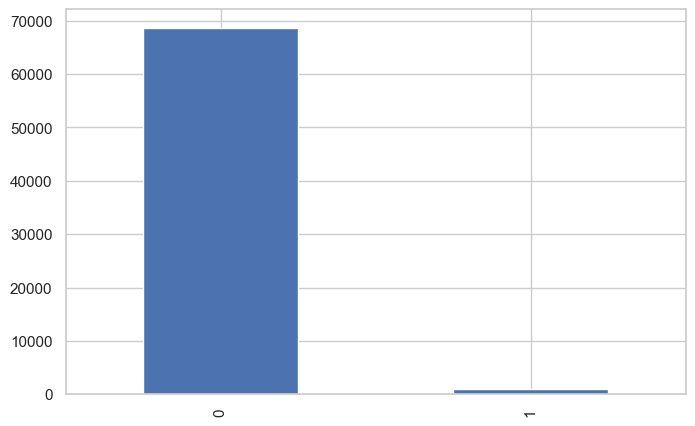

In [73]:
y.value_counts().plot(kind="bar")
# Imbalance Data

In [74]:
# we use smote algorithms for balancing of data

In [75]:
from imblearn.over_sampling import BorderlineSMOTE

In [76]:
smote_border = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smoteborder, y_smoteborder = smote_border.fit_resample(
X,y)

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
tree=DecisionTreeClassifier(max_depth=10)

In [76]:
treemodel=tree.fit(X_smoteborder, y_smoteborder)

In [77]:
treemodel.score(X_smoteborder,y_smoteborder)

0.9174442810766745

In [78]:
pd.DataFrame(treemodel.feature_importances_,X_smoteborder.columns).sort_values(by=0,ascending=False)

,0
Var1,0.604323
Loan_Period,0.078854
Monthly_Income,0.076983
Existing_EMI,0.063105
Primary_Bank_Type,0.035516
Interest_Rate,0.027820
Loan_Amount,0.023597
Contacted,0.020313
Gender,0.016944
Source,0.012861


In [79]:
# removing fealtures with importance less than 0.01
X=X.drop(["Gender","City_Category","Source_Category","Employer_Category2","EMI"],axis=1)

In [80]:
print(y.info())
print(X.info())

<class 'pandas.core.series.Series'>
Int64Index: 69713 entries, 30037 to 99749
Series name: Approved
Non-Null Count  Dtype
--------------  -----
69713 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69713 entries, 30037 to 99749
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employer_Category1  69713 non-null  float64
 1   Primary_Bank_Type   69713 non-null  float64
 2   Contacted           69713 non-null  float64
 3   Source              69713 non-null  float64
 4   Monthly_Income      69713 non-null  float64
 5   Existing_EMI        69713 non-null  float64
 6   Loan_Amount         69713 non-null  float64
 7   Loan_Period         69713 non-null  float64
 8   Interest_Rate       69713 non-null  float64
 9   Var1                69713 non-null  float64
dtypes: float64(10)
memory usage: 5.9 MB
None


In [81]:
# building the final predicting model

In [82]:
from imblearn.over_sampling import BorderlineSMOTE

In [83]:
smote_border = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_border, y_border = smote_border.fit_resample(
X,y)

In [84]:
y_border.value_counts()

0    68693
1    68693
Name: Approved, dtype: int64

In [85]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [86]:
logit=LogisticRegression(max_iter=500)

In [87]:
logitmodel=logit.fit(X_border,y_border)

In [88]:
logitmodel.score(X_border,y_border)

0.7493922233706491

In [89]:
cross_val_score(logit,X_border,y_border)

array([0.73389621, 0.73978236, 0.74269389, 0.73694363, 0.71379699])

In [90]:
np.mean([0.73389621, 0.73978236, 0.74269389, 0.73694363, 0.71379699])

0.733422616

In [91]:
logitpredict=logit.predict(X_border)

In [92]:
print(classification_report(y_border,logitpredict))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74     68693
           1       0.73      0.78      0.76     68693

    accuracy                           0.75    137386
   macro avg       0.75      0.75      0.75    137386
weighted avg       0.75      0.75      0.75    137386



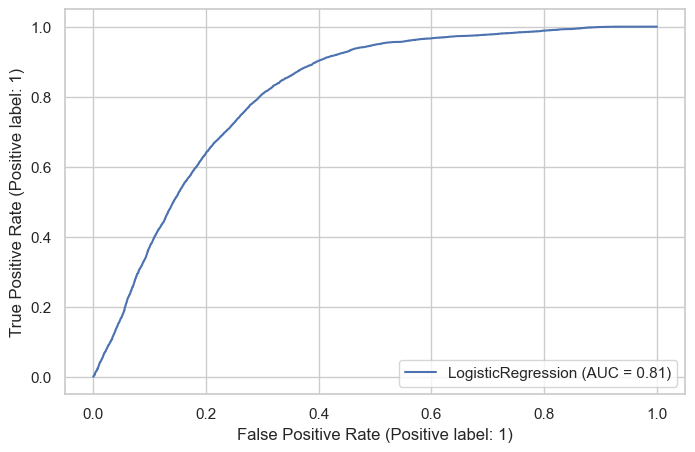

In [93]:
RocCurveDisplay.from_estimator(logit,X_border,y_border)

In [111]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

In [112]:
tree=DecisionTreeClassifier(max_depth=10)

In [113]:
treemodel=tree.fit(X_border,y_border)

In [114]:
treemodel.fit(X_border,y_border)

DecisionTreeClassifier(max_depth=10)

In [115]:
treemodel.score(X_border,y_border)

0.9126912494722897

In [133]:
cross_val_score(tree,X_border,y_border)

array([0.85970595, 0.88150089, 0.89947956, 0.92022419, 0.89409324])

In [174]:
np.mean([0.85970595, 0.88150089, 0.89947956, 0.92022419, 0.89409324])

0.891000766

In [116]:
treepredict=tree.predict(X_border)

In [117]:
print(classification_report(y_border,treepredict))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     68693
           1       0.89      0.94      0.91     68693

    accuracy                           0.91    137386
   macro avg       0.91      0.91      0.91    137386
weighted avg       0.91      0.91      0.91    137386



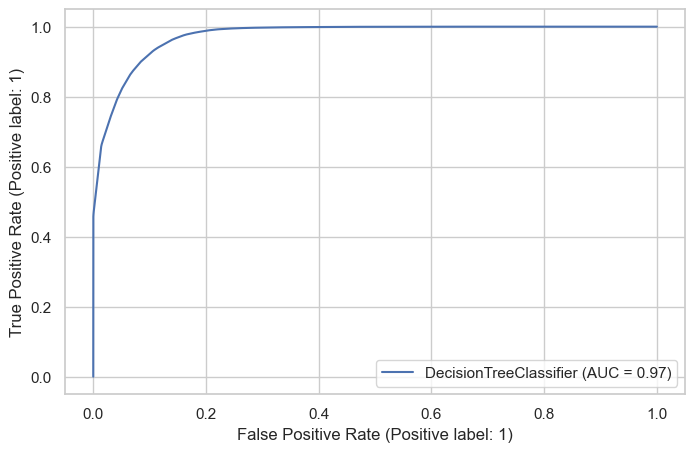

In [118]:
RocCurveDisplay.from_estimator(tree,X_border,y_border)

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
gb=GradientBoostingClassifier()

In [130]:
gbmodel=gb.fit(X_border,y_border)

In [131]:
gbmodel.score(X_border,y_border)

0.9225248569723261

In [134]:
cross_val_score(gb,X_border,y_border)

array([0.85977873, 0.88976235, 0.90071696, 0.94420788, 0.91793136])

In [175]:
np.mean([0.85977873, 0.88976235, 0.90071696, 0.94420788, 0.91793136])

0.902479456

In [135]:
gbpredict=gb.predict(X_border)

In [136]:
print(classification_report(y_border,gbpredict))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     68693
           1       0.92      0.93      0.92     68693

    accuracy                           0.92    137386
   macro avg       0.92      0.92      0.92    137386
weighted avg       0.92      0.92      0.92    137386



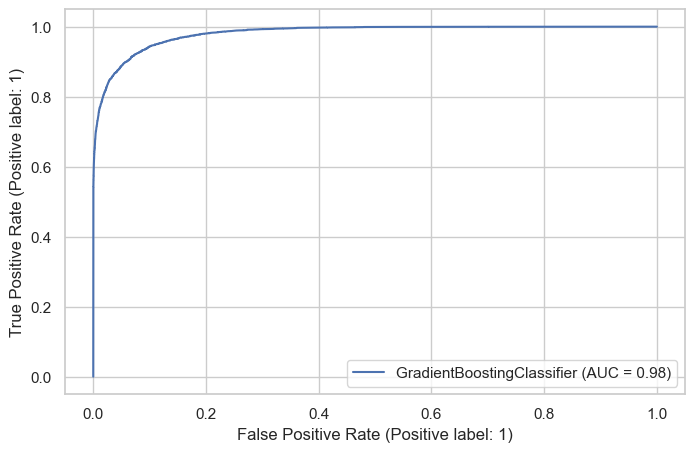

In [137]:
RocCurveDisplay.from_estimator(gb,X_border,y_border)

In [138]:
# knn model
from sklearn.neighbors import KNeighborsClassifier

In [151]:
knc=KNeighborsClassifier(n_neighbors=9)

In [152]:
kncmodel=knc.fit(X_border,y_border)

In [153]:
kncmodel.score(X_border,y_border)

C:\Users\sadin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9639337341504957

In [154]:
cross_val_score(knc,X_border,y_border)

C:\Users\sadin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sadin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0.91273018, 0.93576446, 0.93678349, 0.95137752, 0.9355097 ])

In [176]:
np.mean([0.91273018, 0.93576446, 0.93678349, 0.95137752, 0.9355097 ])

0.9344330700000001

In [155]:
kncpredict=knc.predict(X_border)

C:\Users\sadin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [156]:
print(classification_report(y_border,kncpredict))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     68693
           1       0.95      0.98      0.96     68693

    accuracy                           0.96    137386
   macro avg       0.96      0.96      0.96    137386
weighted avg       0.96      0.96      0.96    137386



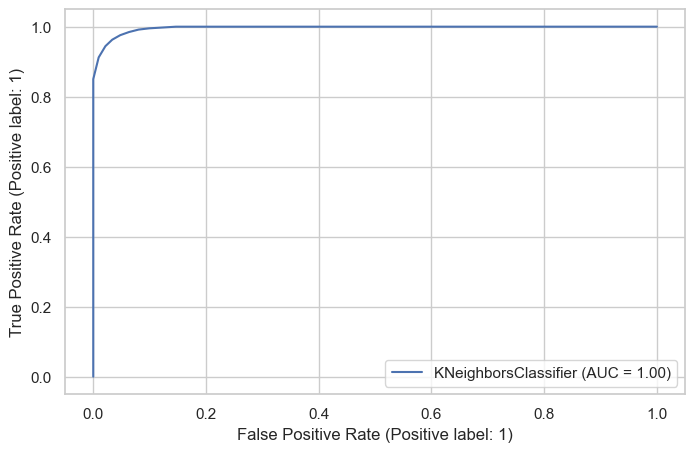

In [157]:
RocCurveDisplay.from_estimator(knc,X_border,y_border)

In [158]:
from sklearn.naive_bayes import GaussianNB

In [159]:
nb=GaussianNB()

In [160]:
nbmodel=nb.fit(X_border,y_border)

In [161]:
nbmodel.score(X_border,y_border)

0.675964072030629

In [162]:
cross_val_score(nb,X_border,y_border)

array([0.62715627, 0.69294319, 0.68460895, 0.66666667, 0.67638388])

In [177]:
np.mean([0.62715627, 0.69294319, 0.68460895, 0.66666667, 0.67638388])

0.669551792

In [163]:
nbpredict=nb.predict(X_border)

In [164]:
print(classification_report(y_border,nbpredict))

              precision    recall  f1-score   support

           0       0.85      0.43      0.57     68693
           1       0.62      0.92      0.74     68693

    accuracy                           0.68    137386
   macro avg       0.73      0.68      0.66    137386
weighted avg       0.73      0.68      0.66    137386



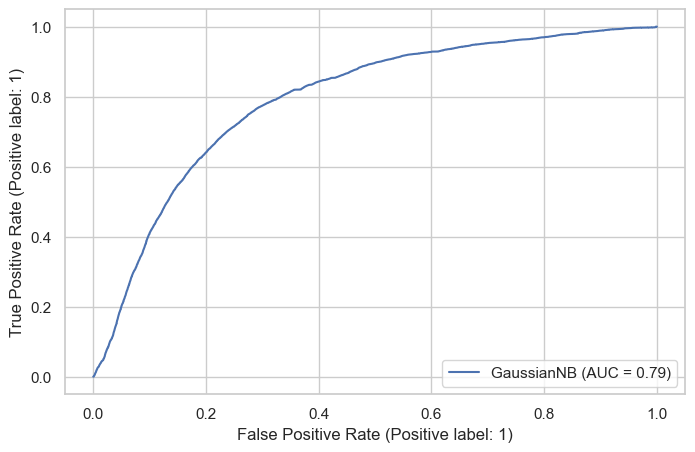

In [165]:
RocCurveDisplay.from_estimator(nb,X_border,y_border)

In [166]:
from sklearn.svm import SVC

In [167]:
svc=SVC()

In [168]:
svcmodel=svc.fit(X_border,y_border)

In [169]:
svcmodel.score(X_border,y_border)

0.7643719156245906

In [170]:
svcpredict=svc.predict(X_border)

In [171]:
print(classification_report(y_border,svcpredict))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75     68693
           1       0.74      0.82      0.78     68693

    accuracy                           0.76    137386
   macro avg       0.77      0.76      0.76    137386
weighted avg       0.77      0.76      0.76    137386



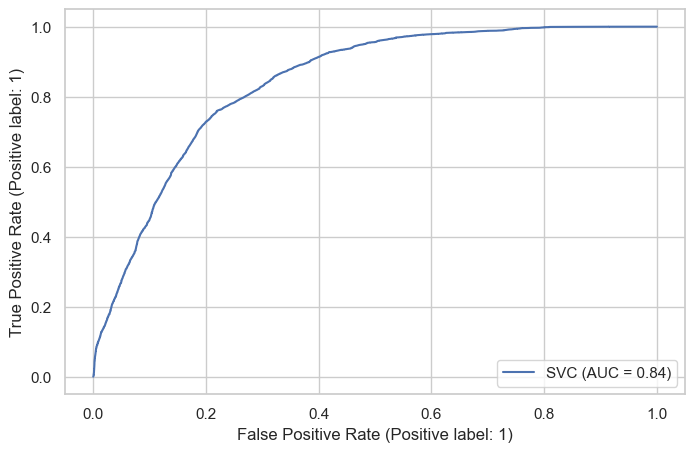

In [172]:
RocCurveDisplay.from_estimator(svc,X_border,y_border)

# COMPARING ALL MODELS PERFORMANCE

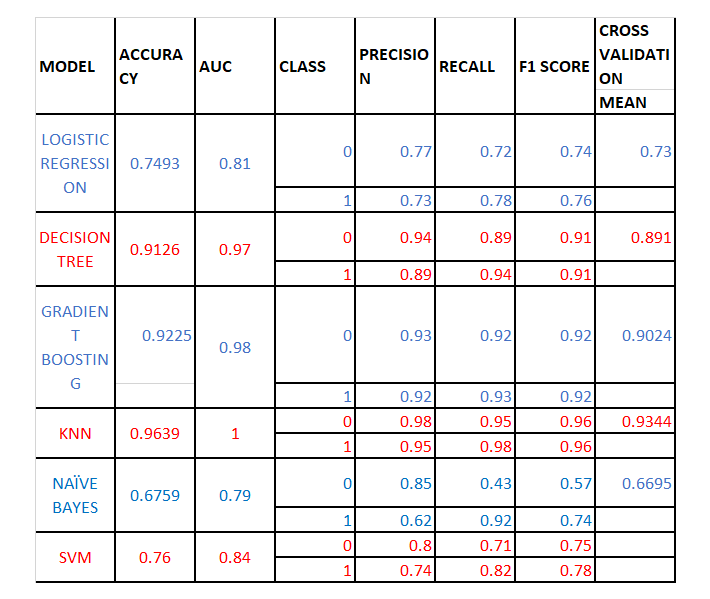

In [ ]:
# BY COMPARING ALL THE MODELS WE CAN SEE THAT KNEIBORS 